In [2]:
# Importing necessary libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing Data set
df1= pd.read_csv(r'C:\Users\Hp\Desktop\need\python\Target Sales\Business_Data.csv') 
df2= pd.read_csv(r'C:\Users\Hp\Desktop\need\python\Target Sales\Sales_History.csv') 
df3= pd.read_csv(r'C:\Users\Hp\Desktop\need\python\Target Sales\Store_Details.csv', encoding='windows-1252') 

In [4]:
# The shape of all three dataset
print(df1.shape) #business data
print(df2.shape) #sales history
print(df3.shape) #Store details

#Sales history - Historical sales data of each store having 421570 data points and 5 columns.
#Store details - Contains Information about 45 stores.
#Business data - Contains additional data has 8190 data points and 12 columns

(8190, 12)
(421570, 5)
(45, 6)


In [5]:
df1.head() #first 5 observation of business data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df2.head() # first 5 observation of sales data


,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
1,1,1,11/30/2017,46039.49,True
2,1,1,2/17/2017,41595.55,False
3,1,1,2/24/2017,19403.54,False
4,1,1,5/1/2017,21827.90,False


In [7]:
df3.head() # first 5 observation of store data

,Store,Type,Address,Area_Code,Location,Size
0,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,2,E-Commerce Fulfillment,"1000 Commerce Ave, Atwater, California",95301,Bayfair Cente,202307
2,3,Food,"15555 East 14th Street, San Leandro, California",94578,Capitola Mal,37392
3,4,E-Commerce Fulfillment,"1855 41st Avenue, Capitola, California",95010,Chino Spectrum Marketplace & Towne Cente,205863
4,5,Food,"3800-4046 Grand Ave.& 3801-4097 Grand Ave., Ch...",91710,Eagle Rock Plaz,34875


In [8]:
# Removing the garbage columns from Sales data that is holday and department
df2.drop(['Holiday','Department'],axis=1,inplace=True)

In [9]:
df2.head()

,Store,Date,Total_Sales
0,1,4/30/2017,24924.50
1,1,11/30/2017,46039.49
2,1,2/17/2017,41595.55
3,1,2/24/2017,19403.54
4,1,5/1/2017,21827.90


In [10]:
# group the df2 on date columns
df2= df2.groupby(['Store','Date']).agg({'Total_Sales': 'sum'}).reset_index()
df2.head()

,Store,Date,Total_Sales
0,1,1/11/2019,1459601.17
1,1,1/12/2018,1391013.96
2,1,1/18/2019,1394393.84
3,1,1/19/2018,1327405.42
4,1,1/2/2018,1495064.75


In [11]:
#  the shape of df2
df2.shape

(6435, 3)

In [12]:
# Merging all 3 datasets based on common columns
df1_df2 = pd.merge(df1, df2, how = 'left', left_on=['Store','Date'], right_on = ['Store','Date'])
df = pd.merge(df1_df2, df3, on = 'Store', how = 'left')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Address,Area_Code,Location,Size
0,1,4/30/2017,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,1,11/30/2017,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
2,1,2/17/2017,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
3,1,2/24/2017,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,1,5/1/2017,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315


In [13]:
# Replacing all NA values in the markdowns  with zero as NA stands for "no discount"
for i in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
  df[i] = df[i].fillna(0)

In [14]:
# Replacing the Column Holidays , False =NO, and True=YES
df['Holiday']=np.where(df['Holiday']==False,"No","Yes")

In [15]:
# converting the column of Date into Datetime datatype and extracting week number from date columns
df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week

C:\Users\Hp\AppData\Local\Temp/ipykernel_2452/1841375807.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weeknumber']= pd.to_datetime(df['Date'],errors ='coerce').dt.week


In [16]:
# adding all the MarksDowns which is discount given on particular dates and names a new column which is Totaol_markdown

# Adding all the markdown 1 to 5:
df['Total_MarkDown']= df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']

# droping the useless columns 
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date','Store','Address', 'Area_Code', 'Location'], inplace = True,axis=1)

In [17]:
df.head()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
0,42.31,2.572,211.096358,8.106,No,1643690.90,E-Commerce Fulfillment,151315,17,0.0
1,38.51,2.548,211.242170,8.106,Yes,1641957.44,E-Commerce Fulfillment,151315,48,0.0
2,39.93,2.514,211.289143,8.106,No,1611968.17,E-Commerce Fulfillment,151315,7,0.0
3,46.63,2.561,211.319643,8.106,No,1409727.59,E-Commerce Fulfillment,151315,8,0.0
4,46.50,2.625,211.350143,8.106,No,1554806.68,E-Commerce Fulfillment,151315,18,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        8190 non-null   float64
 1   Fuel_Price         8190 non-null   float64
 2   CPI                7605 non-null   float64
 3   Unemployment_Rate  7605 non-null   float64
 4   Holiday            8190 non-null   object 
 5   Total_Sales        6435 non-null   float64
 6   Type               8190 non-null   object 
 7   Size               8190 non-null   int64  
 8   weeknumber         8190 non-null   int64  
 9   Total_MarkDown     8190 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 703.8+ KB


In [19]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,weeknumber,Total_MarkDown
count,8190.000000,8190.000000,7605.000000,7605.000000,6.435000e+03,8190.000000,8190.000000,8190.000000
mean,59.356198,3.405992,172.460809,7.826821,1.046965e+06,130287.600000,25.851648,8881.703448
std,18.678607,0.431337,39.738346,1.877259,5.643666e+05,63115.971429,14.788965,19084.538888
min,-7.290000,2.472000,126.064000,3.684000,2.099862e+05,34875.000000,1.000000,-1692.480000
25%,45.902500,3.041000,132.364839,6.634000,5.533501e+05,70713.000000,13.000000,0.000000
50%,60.710000,3.513000,182.764003,7.806000,9.607460e+05,126512.000000,25.000000,0.000000
75%,73.880000,3.743000,213.932412,8.567000,1.420159e+06,202307.000000,38.000000,11819.642500
max,101.950000,4.468000,228.976456,14.313000,3.818686e+06,219622.000000,52.000000,783529.450000


In [20]:
#The Total_MarkDown which is discount given on that particular date, it should not be negative

# looking at the neagative discount


df[df['Total_MarkDown']<0]

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
5437,49.09,3.597,224.054703,6.237,No,NaN,Regional,42988,8,-1692.48
6518,68.04,3.204,222.325549,6.228,No,NaN,E-Commerce Fulfillment,39910,28,-80.11


In [21]:
# Droping all the Total_MarkDown  values  less than 0 in columns 'Total_MarkDown'
df.drop(df.index[df['Total_MarkDown'] < 0], inplace = True)
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,weeknumber,Total_MarkDown
count,8188.000000,8188.000000,7603.000000,7603.000000,6.435000e+03,8188.000000,8188.000000,8188.000000
mean,59.356391,3.405993,172.447465,7.827240,1.046965e+06,130309.299707,25.853566,8884.089378
std,18.680297,0.431378,39.735050,1.877327,5.643666e+05,63108.398424,14.789436,19086.254913
min,-7.290000,2.472000,126.064000,3.684000,2.099862e+05,34875.000000,1.000000,0.000000
25%,45.900000,3.041000,132.364839,6.634000,5.533501e+05,70713.000000,13.000000,0.000000
50%,60.710000,3.513000,182.716838,7.806000,9.607460e+05,126512.000000,25.000000,0.000000
75%,73.880000,3.743000,213.932412,8.567000,1.420159e+06,202307.000000,38.000000,11824.377500
max,101.950000,4.468000,228.976456,14.313000,3.818686e+06,219622.000000,52.000000,783529.450000


In [22]:
# Number of missing values in each column of the dataset
df.isnull().sum()

Temperature             0
Fuel_Price              0
CPI                   585
Unemployment_Rate     585
Holiday                 0
Total_Sales          1753
Type                    0
Size                    0
weeknumber              0
Total_MarkDown          0
dtype: int64

In [23]:
# Percentage of missing vaue 
df.isnull().sum()/len(df)

Temperature          0.000000
Fuel_Price           0.000000
CPI                  0.071446
Unemployment_Rate    0.071446
Holiday              0.000000
Total_Sales          0.214094
Type                 0.000000
Size                 0.000000
weeknumber           0.000000
Total_MarkDown       0.000000
dtype: float64

In [24]:
#"Total_Sales" has 53.8 % missing values representing those rows where we need to predict "Total_sales" thus we dont treat them.
# Handling the missing values in column CPI 
df['CPI'].fillna(df1['CPI'].mean(),inplace=True)

# Handling the missing values in column Unemployment_Rate 
df['Unemployment_Rate'].fillna(df1['Unemployment_Rate'].mean(),inplace=True)

In [25]:
df.isnull().sum()/len(df) ## no missing values

Temperature          0.000000
Fuel_Price           0.000000
CPI                  0.000000
Unemployment_Rate    0.000000
Holiday              0.000000
Total_Sales          0.214094
Type                 0.000000
Size                 0.000000
weeknumber           0.000000
Total_MarkDown       0.000000
dtype: float64

In [26]:
## OUTLIER TREATMENT
# Function to return outliers
def detect_outlier(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

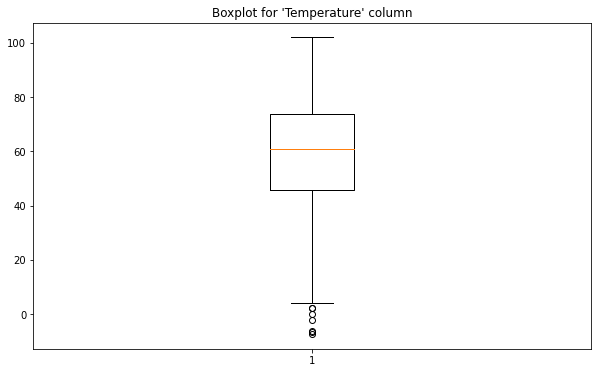

In [27]:
# Boxplot plot to check if there are any outliers in the 'Temperature' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Temperature'])
plt.title("Boxplot for 'Temperature' column")
plt.show() ## OUTLIER PRESENT

In [28]:
# Outliers in 'Temperature' column
outlier_data = detect_outlier(df['Temperature'])
print("Outliers for 'Temperature' column are : ", outlier_data) #not removing outlier becuse temperature going beyong -7 is fine

Outliers for 'Temperature' column are :  [-2.06, 2.32, -6.08, -6.61, -7.29, 2.45, 0.25]


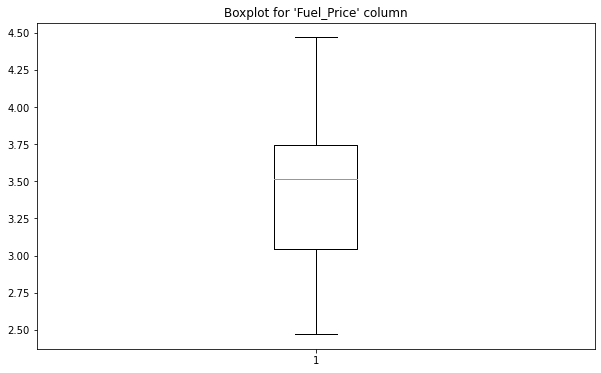

In [29]:
# Boxplot plot to check if there are any outliers in the fuel column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Fuel_Price'])
plt.title("Boxplot for 'Fuel_Price' column")
plt.show()  # no outliers found

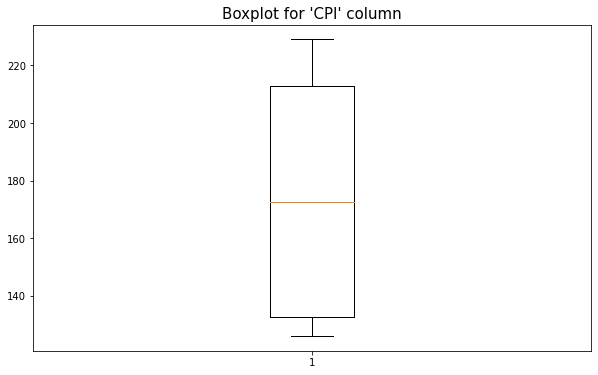

In [30]:
# Boxplot plot to check if there are any outliers in the 'cpi column 
plt.figure(figsize=(10,6))
plt.boxplot(df['CPI'])
plt.title("Boxplot for 'CPI' column",fontsize=15)
plt.show()  # no outliers found

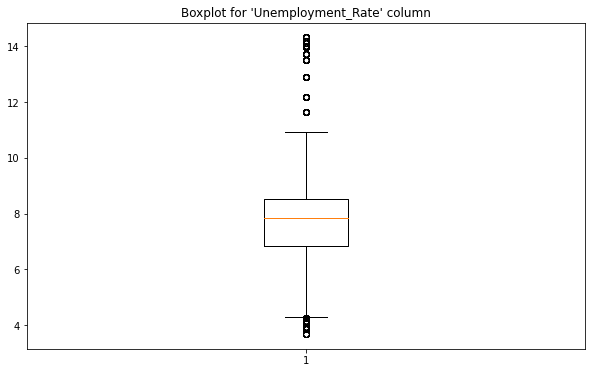

In [31]:
# Boxplot plot to check if there are any outliers in the Unemployment_Rate column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Unemployment_Rate'])
plt.title("Boxplot for 'Unemployment_Rate' column")
plt.show()  #Outliers found

In [32]:
# Outliers in 'Unemployment_Rate' column
outlier_data = detect_outlier(df['Unemployment_Rate'])
print("Outliers for 'Unemployment_Rate' column are : ", outlier_data)## Unemployment rate going beyong 13 is fine.thus not removing the outliers

Outliers for 'Unemployment_Rate' column are :  [13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.313, 14

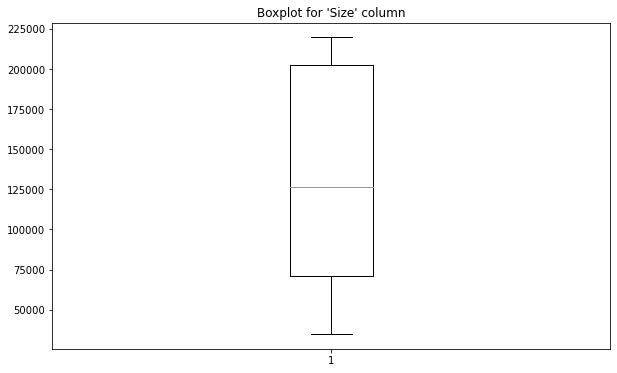

In [33]:
# Boxplot to check if there are any outliers in the 'Size' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Size'])
plt.title("Boxplot for 'Size' column")
plt.show()  # no outliers found

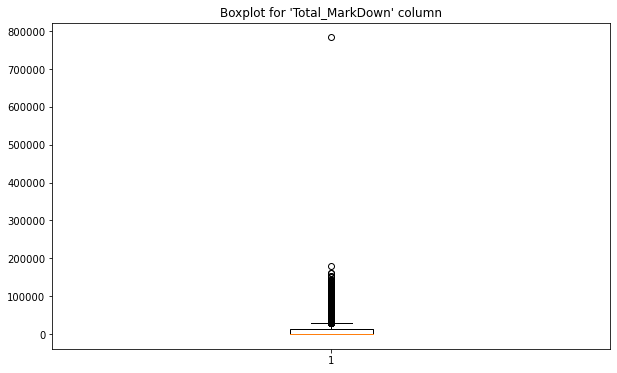

In [34]:
# Boxplot to check if there are any outliers in the 'Total_markdown' column 
plt.figure(figsize=(10,6))
plt.boxplot(df['Total_MarkDown'])
plt.title("Boxplot for 'Total_MarkDown' column")
plt.show()##outliers found

In [35]:
# Outliers in 'Total_markdown' column
outlier_data = detect_outlier(df['Total_MarkDown'])
print("Outliers for 'Total_MarkDown' column are : ", outlier_data)

Outliers for 'Total_MarkDown' column are :  [76351.06999999999, 76311.31000000001, 98974.87, 80045.4, 105528.0, 134773.50999999998, 109611.15000000001, 73717.26, 117660.84, 93322.93, 82098.40000000001, 110681.95, 101118.65999999999, 110853.45, 73561.14000000001, 84794.95, 92849.95, 74133.28, 115281.12999999999, 67107.66, 66563.21, 106926.52000000002, 77418.75, 78684.32999999999, 143223.31, 117682.51999999999, 83583.57, 149976.71, 79820.62999999999, 119437.66, 73367.27, 96513.93000000001, 85532.16, 122659.41, 70708.06, 70669.22, 133315.06, 66720.95999999999, 101355.79, 115446.52, 75070.48000000001, 114565.27, 70523.39, 100916.17, 126999.28, 66448.95, 69704.73, 153504.44, 75974.07, 178693.13999999998, 91671.96, 83143.31, 67395.51, 143777.92, 66197.91, 108493.39, 116118.54, 67634.55, 78258.6, 67583.15000000001, 78646.05, 96601.45, 106255.08, 72758.08, 69881.05, 81094.48, 75210.07999999999, 101206.8, 93464.21999999999, 117920.3, 118242.04, 66982.93000000001, 69327.23, 151904.86000000002, 1

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Total_MarkDown distributions')

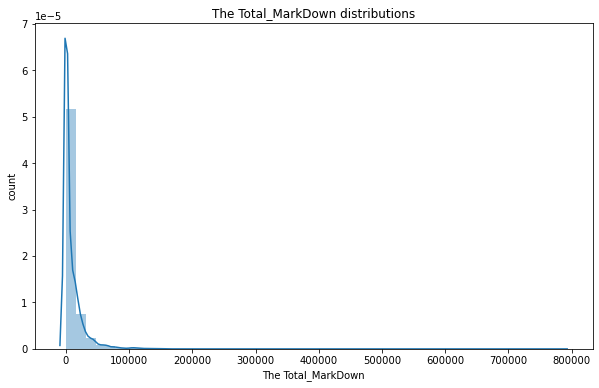

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(df['Total_MarkDown'])
plt.xlabel('The Total_MarkDown')
plt.ylabel('count')
plt.title('The Total_MarkDown distributions')

In [37]:
## Fearture Scaling
# Continuous variables and categorical variables
continuous_variable= df[["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate", "Total_Sales", "Size"]]
categorical_variable = df[["Holiday", "Type","Total_MarkDown"]]

In [38]:
continuous_variable.corr()

,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size
Temperature,1.000000,0.101416,0.158765,0.145653,-0.063810,-0.093383
Fuel_Price,0.101416,1.000000,-0.184169,-0.032907,0.009464,0.015077
CPI,0.158765,-0.184169,1.000000,-0.302919,-0.072634,-0.008955
Unemployment_Rate,0.145653,-0.032907,-0.302919,1.000000,-0.106176,-0.073715
Total_Sales,-0.063810,0.009464,-0.072634,-0.106176,1.000000,0.810468
Size,-0.093383,0.015077,-0.008955,-0.073715,0.810468,1.000000


<AxesSubplot:>

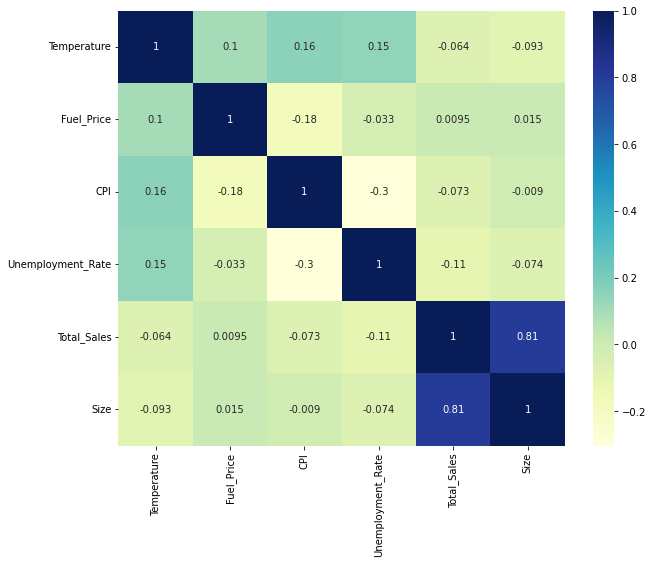

In [39]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(continuous_variable.corr(),annot = True, cmap = "YlGnBu")
#Total_sales vs Temeprature---> Weak correlation
#Total_sales vs fuel_price---> No correlation
#Total_sales vs CPI---> Weak correlation
#Total_sales vs unemployment_rate---> Weak correlation
#Total_sales vs size--->strong positive correlation

In [40]:
# finding and removing correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
correlation(continuous_variable,0.9)## taking threshold as 0.9

set()

In [42]:
##There is no multi colinearity
# We will remove fuel price 
df.drop('Fuel_Price',axis=1,inplace=True)

In [43]:
#categorical vs contnoius----> ANOVA testing

import statsmodels.api as sm
from statsmodels.formula.api import ols


for col in categorical_variable:
    model = ols('Total_Sales' + '~' + col, data = df).fit() # Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print("Anova test results for", col)
    print(result_anova)
    print("\n")

Anova test results for Holiday
              df        sum_sq       mean_sq         F    PR(>F)
Holiday      1.0  2.788970e+12  2.788970e+12  8.766881  0.003079
Residual  6433.0  2.046502e+15  3.181257e+11       NaN       NaN


Anova test results for Type
              df        sum_sq       mean_sq            F  PR(>F)
Type         2.0  7.469750e+14  3.734875e+14  1844.614512     0.0
Residual  6432.0  1.302316e+15  2.024746e+11          NaN     NaN


Anova test results for Total_MarkDown
                    df        sum_sq       mean_sq         F        PR(>F)
Total_MarkDown     1.0  1.102487e+14  1.102487e+14  365.7628  2.413244e-79
Residual        6433.0  1.939043e+15  3.014212e+11       NaN           NaN




In [44]:
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown
0,42.31,211.096358,8.106,No,1643690.90,E-Commerce Fulfillment,151315,17,0.0
1,38.51,211.242170,8.106,Yes,1641957.44,E-Commerce Fulfillment,151315,48,0.0
2,39.93,211.289143,8.106,No,1611968.17,E-Commerce Fulfillment,151315,7,0.0
3,46.63,211.319643,8.106,No,1409727.59,E-Commerce Fulfillment,151315,8,0.0
4,46.50,211.350143,8.106,No,1554806.68,E-Commerce Fulfillment,151315,18,0.0


In [45]:
# Label encoding 
df['Holiday'].replace({"Yes":1,"No":0},inplace=True)
df['Total_MarkDown'].replace({"High" : 1, "Low" : 0}, inplace = True)

In [46]:
#One hot encoding
Types= pd.get_dummies(df['Type'],drop_first=True)

In [47]:
# Now we will concate the type 
df= pd.concat([df,Types],axis=1)
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,E-Commerce Fulfillment,151315,17,0.0,0,0
1,38.51,211.242170,8.106,1,1641957.44,E-Commerce Fulfillment,151315,48,0.0,0,0
2,39.93,211.289143,8.106,0,1611968.17,E-Commerce Fulfillment,151315,7,0.0,0,0
3,46.63,211.319643,8.106,0,1409727.59,E-Commerce Fulfillment,151315,8,0.0,0,0
4,46.50,211.350143,8.106,0,1554806.68,E-Commerce Fulfillment,151315,18,0.0,0,0


In [48]:
# Drop the column 'Type'
df.drop('Type',inplace=True,axis=1)
df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,151315,17,0.0,0,0
1,38.51,211.242170,8.106,1,1641957.44,151315,48,0.0,0,0
2,39.93,211.289143,8.106,0,1611968.17,151315,7,0.0,0,0
3,46.63,211.319643,8.106,0,1409727.59,151315,8,0.0,0,0
4,46.50,211.350143,8.106,0,1554806.68,151315,18,0.0,0,0


In [49]:
df.columns

Index(['Temperature', 'CPI', 'Unemployment_Rate', 'Holiday', 'Total_Sales',
       'Size', 'weeknumber', 'Total_MarkDown', 'Food', 'Regional'],
      dtype='object')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Total sales distributions')

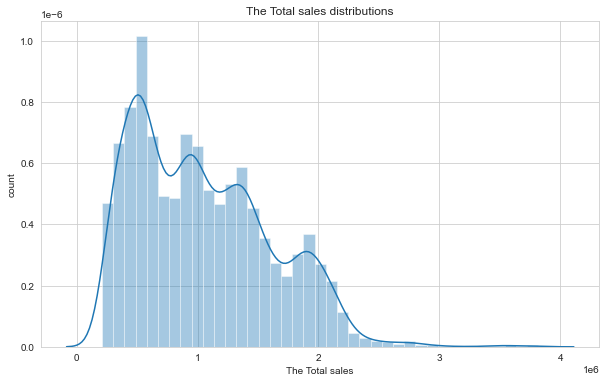

In [50]:
## Univariate and Bivariate Analysis
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Total_Sales'])
plt.xlabel('The Total sales')
plt.ylabel('count')
plt.title('The Total sales distributions')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of Temperature')

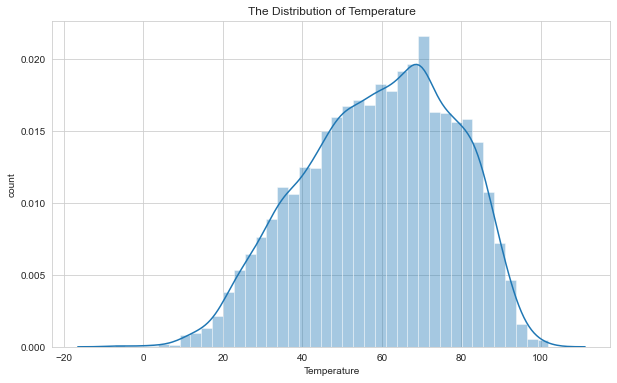

In [51]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('count')
plt.title('The Distribution of Temperature')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of CPI')

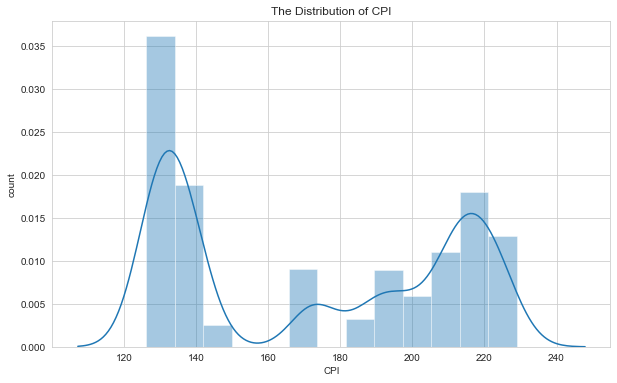

In [52]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df['CPI'])
plt.xlabel('CPI')
plt.ylabel('count')
plt.title('The Distribution of CPI')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Holidays')

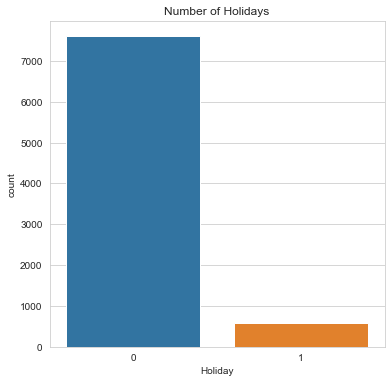

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(df['Holiday'])
plt.xlabel('Holiday')
plt.ylabel('count')
plt.title('Number of Holidays')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weeknumber', ylabel='count'>

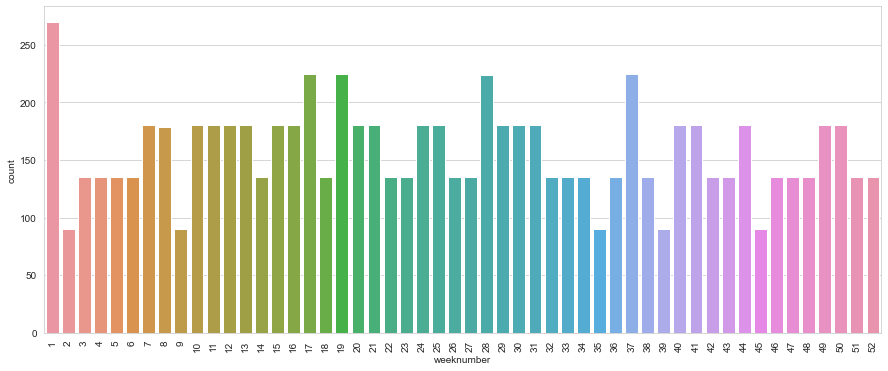

In [54]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df.weeknumber)

Text(0.5, 1.0, 'Number of Holidays')

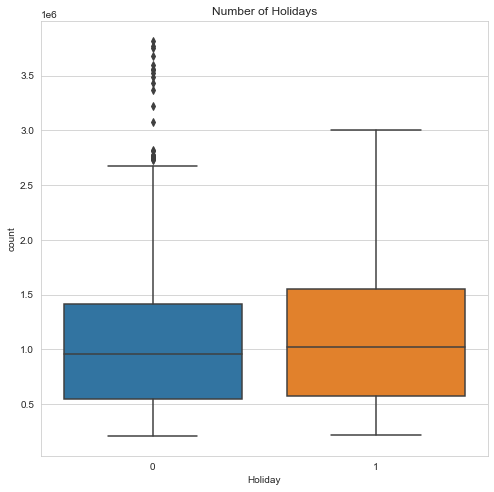

In [55]:
## BIVARIARE ANALYSIS

# Holidays and sales 
plt.figure(figsize=(8,8))
sns.boxplot(x='Holiday',y='Total_Sales',data=df)
plt.xlabel('Holiday')
plt.ylabel('count')
plt.title('Number of Holidays')

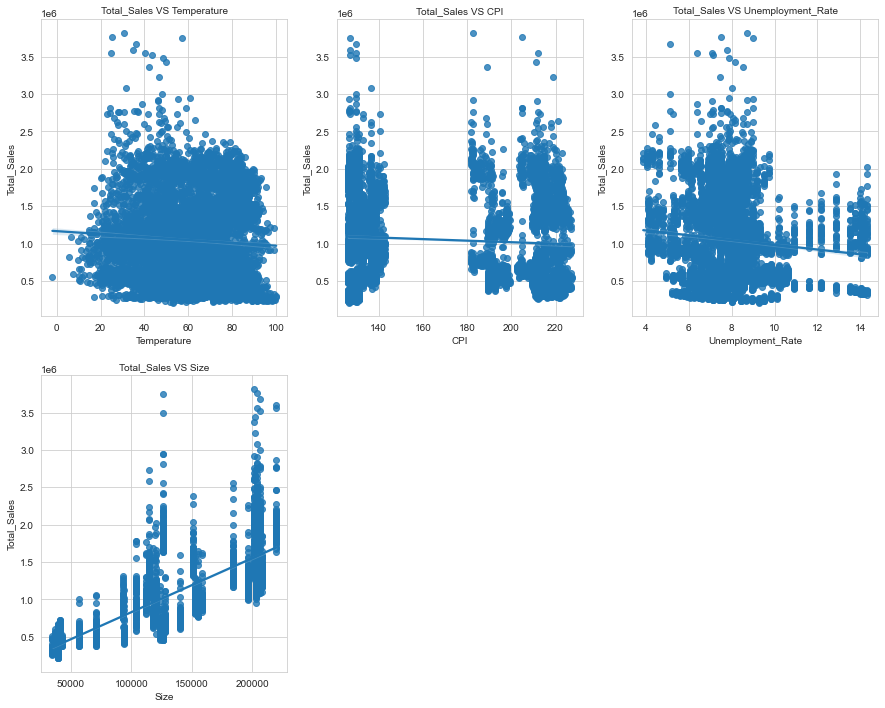

In [57]:
#  scatter plot for continuous variables 
plt.figure(figsize = (15,12))
cols = ["Temperature", "CPI", "Unemployment_Rate", "Size"]
s = 1
for r in range(len(cols)):
  plt.subplot(2,3,s)
  s = s + 1
  sns.regplot(x = cols[r], y = 'Total_Sales', data = df, fit_reg=True)
  plt.title("Total_Sales VS " + cols[r], fontsize = 10)

In [58]:
# Training data
train_df= df.copy()

In [59]:
# Dropping nan values from training data
train_df.dropna(inplace=True)
train_df.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,42.31,211.096358,8.106,0,1643690.90,151315,17,0.0,0,0
1,38.51,211.242170,8.106,1,1641957.44,151315,48,0.0,0,0
2,39.93,211.289143,8.106,0,1611968.17,151315,7,0.0,0,0
3,46.63,211.319643,8.106,0,1409727.59,151315,8,0.0,0,0
4,46.50,211.350143,8.106,0,1554806.68,151315,18,0.0,0,0


In [60]:
# Creating Independet and dependet variables
X=train_df.drop('Total_Sales',axis=1)
y= train_df['Total_Sales']

In [62]:
## FITTING THE MODEL
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.transform(X_test)

In [64]:
## Linear regression Model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [65]:
y_pred=reg.predict(X_test_scaled)

In [66]:
print(reg.score(X_test_scaled,y_test))
print(reg.score(X_train_scaled,y_train))

0.6860695057044646
0.6776093002599903


In [67]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage Error:',metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 235324.76745388142
Mean Squared Error: 99221637065.18541
Root Mean Squared Error: 314994.66196300124
Mean Absolute percentage Error: 0.25146637058977894


In [68]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred= rf_reg.predict(X_test)

In [70]:
print(rf_reg.score(X_test,y_test))
print(rf_reg.score(X_train,y_train))

0.9550032673035593
0.9938048852326972


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage Error:',metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 66745.70414926184
Mean Squared Error: 14221776991.573057
Root Mean Squared Error: 119255.09209913452
Mean Absolute percentage Error: 0.060688981574776875


In [72]:
## Stat Model
x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)
# training the model and printing the model statistics
model_stats = sm.OLS(y_train,x_train).fit()
model_stats.summary()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1200.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:57:20   Log-Likelihood:                -72573.
No. Observations:                5148   AIC:                         1.452e+05
Df Residuals:                    5138   BIC:                         1.452e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.473e+05    4.2e+04      5.891      0.000    1.65e+05     3.3e+05
Temperature        1092.5582    258.991      4.219      0.000     584.825    1600.292
CPI               -1309.6924    123.053    -10.643      0.000   -1550.930   -1068.455
Unemployment_Rate  -2.09e+04   2604.358     -8.026      0.000    -2.6e+04   -1.58e+04
Holiday            4.105e+04   1.91e+04      2.145      0.032    3530.199    7.86e+04
Size                  7.7680      0.117     66.198      0.000       7.538       7.998
weeknumber         2239.9085    329.836      6.791      0.000    1593.290    2886.527
Total_MarkDown        2.2396      0.330      6.780      0.000       1.592       2.887
Food               3.805e+04   1.33e+04      2.866      0.004     1.2e+04    6.41e+04
Regional           1.871e+05   2.13e+04      8.793      0.000    1.45e+05    2.29e+05
==============================================================================
Omnibus:                     1363.902   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5108.064
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       7.154   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# Droppig the variable which is not statstically significant 
x_train_new=X_train.drop('Temperature',axis=1)
x_test_new=X_test.drop('Temperature',axis=1)

In [78]:
# Again fitting the model on new train data
reg.fit(x_train_new,y_train)

LinearRegression()

In [79]:
#Building stat model
x_train_stat = sm.add_constant(x_train_new)
x_test_stat = sm.add_constant(x_test_new)
# training the model and printing the model statistics
model_stats = sm.OLS(y_train,x_train_stat).fit()
model_stats.summary()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1343.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:02:27   Log-Likelihood:                -72582.
No. Observations:                5148   AIC:                         1.452e+05
Df Residuals:                    5139   BIC:                         1.452e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.867e+05    4.1e+04      6.993      0.000    2.06e+05    3.67e+05
CPI               -1200.0650    120.474     -9.961      0.000   -1436.246    -963.884
Unemployment_Rate -1.937e+04   2583.075     -7.499      0.000   -2.44e+04   -1.43e+04
Holiday            2.571e+04   1.88e+04      1.366      0.172   -1.12e+04    6.26e+04
Size                  7.7282      0.117     65.965      0.000       7.499       7.958
weeknumber         2428.0872    327.339      7.418      0.000    1786.363    3069.811
Total_MarkDown        2.1684      0.330      6.562      0.000       1.521       2.816
Food               3.186e+04   1.32e+04      2.411      0.016    5950.457    5.78e+04
Regional           1.866e+05   2.13e+04      8.754      0.000    1.45e+05    2.28e+05
==============================================================================
Omnibus:                     1319.963   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4702.182
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                       6.953   Cond. No.                     1.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
## Test data to be predicted 
test_data = df[df['Total_Sales'].isna()].reset_index().drop(columns = ['index'])
test_data.head()

,Temperature,CPI,Unemployment_Rate,Holiday,Total_Sales,Size,weeknumber,Total_MarkDown,Food,Regional
0,55.32,223.462779,6.573,0,NaN,151315,6,18342.28,0,0
1,61.24,223.481307,6.573,0,NaN,151315,37,25633.44,0,0
2,52.92,223.512911,6.573,0,NaN,151315,46,17838.00,0,0
3,56.23,223.561947,6.573,1,NaN,151315,47,76311.31,0,0
4,52.34,223.610984,6.573,0,NaN,151315,48,13415.29,0,0


In [81]:
#Dropping the sales column from test data
test_data.drop('Total_Sales',inplace=True,axis=1)

In [83]:
#scalling the test data
test_data_scaled= scaler.transform(test_data)

In [84]:
# converting into data frame
test_data_scaled=pd.DataFrame(test_data_scaled)
test_data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.526216,0.962735,0.258194,0.0,0.630267,0.098039,0.114275,0.0,0.0
1,0.588795,0.962918,0.258194,0.0,0.630267,0.705882,0.159699,0.0,0.0
2,0.500846,0.963231,0.258194,0.0,0.630267,0.882353,0.111133,0.0,0.0
3,0.535835,0.963716,0.258194,1.0,0.630267,0.901961,0.475428,0.0,0.0
4,0.494715,0.964200,0.258194,0.0,0.630267,0.921569,0.083579,0.0,0.0


In [85]:
prediction_result = rf_reg.predict(test_data_scaled)
test_data_scaled['Total_Sales'] = prediction_result

In [ ]:
## We have predicted the total sales.We prefer random forest model as it has an accuracy of 94 % where as stat and sklearn model had accuracy aroung 65%